# TinWidgets Tests
`__version__ : '0.1.0'`


In [3]:
import tinwidgets as tinw
import importlib

importlib.reload(tinw)
if tinw.__version__ != '0.1.0':
    raise Exception('tinwidgets version is not 0.1.0, it is', tinw.__version__)
else:
    print('tinwidgets version is 0.1.0, proceeding...')

tinwidgets version is 0.1.0, proceeding...


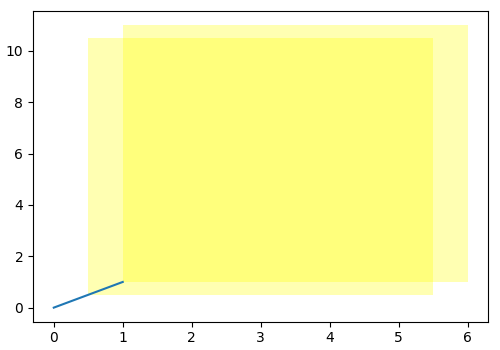

In [4]:
''' 
This is the basic test to check if the package is working correctly.
Nothing is changed from the last demo in 0.0.0_tests.ipynb, execpt 
dividing the code into modules.
'''
from test_utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

%matplotlib widget
importlib.reload(tinw)

import tinwidgets as tinw
# prepare_env()

with plt.ioff():
    fig, ax = plt.subplots()

x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

fig.canvas.mpl_connect('pick_event', tinw.on_pick)
fig.canvas.mpl_connect('motion_notify_event', tinw.on_move)
fig.canvas.mpl_connect('button_release_event', tinw.on_release)
fig.canvas.mpl_connect('figure_leave_event', tinw.on_release)
fig.canvas.mpl_connect('draw_event', tinw.on_draw)

fig.show()

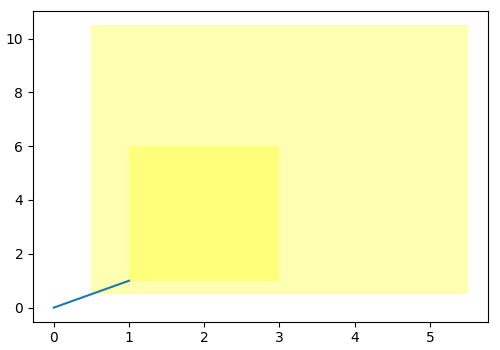

In [9]:
fig, ax = tinw.subplots()

x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 2, 5, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

fig.canvas.mpl_connect('pick_event', tinw.on_pick)
fig.canvas.mpl_connect('motion_notify_event', tinw.on_move)
fig.canvas.mpl_connect('button_release_event', tinw.on_release)
fig.canvas.mpl_connect('figure_leave_event', tinw.on_release)
fig.canvas.mpl_connect('draw_event', tinw.on_draw)

fig.show()

In [8]:
tinw.widget_handler.show_logs()

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [2]:
from ipywidgets import interact, HBox, VBox, Output, HTML, Dropdown, Button, Layout, Label
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
class demo():
    def __init__(self):
        style="""
            <style>
                /* enlarges the default jupyter cell outputs, can revert by Cell->Current Outputs->Clear */
                .container { width:1020 !important; } 
                
                /* styles for output widgets */
                .o2 {width:400px; border:1px solid #ddd}
                .o3 {width:400px; border:1px solid #ddd}
                .o4 {width:400px; border:1px solid #ddd}
                .o5 {width:800px; }
                .o5 span {color:red !important}
                
                /* custom styles for testing */
                .style_A {background-color:#fafaaa}
                .style_B {background-color:#faaafa}
                .style_C {background-color:#aafafa}
            </style>
        """
        display(HTML(style))
        self.o1 = Output(layout=Layout(width='400px'))
        self.o2 = Output() 
        self.o2.add_class('o2')
        self.o3 = Output()
        self.o3.add_class('o3')
        self.o4 = Output()
        self.o4.add_class('o4')
        self.o5 = Output()
        self.o5.add_class('o5')
        # create a scene for displaying the outputs, 
        # Output1 on the top row, 2,3, and 4 stacked horizontally in the second row
        scene = VBox([self.o1,
                      HBox([self.o2, self.o3, self.o4]),
                      self.o5
                     ])
        display(scene)
    
        with self.o1:
            display(HTML('<h2>Demo</h2>'))
            
        with self.o2:
            self.dd_filter = Dropdown(description='Select Filter', options=['', 'A','B','C'])
            self.dd_filter.observe(self.fill_values)
            
            self.dd_values = Dropdown(description='Select Value')
            
            self.btn = Button(description='Run')
            self.btn.on_click(self.display_results)
            
            display(self.dd_filter, self.dd_values, self.btn)
            
            
    def fill_values(self,x):
        if x['type'] == 'change' and x['name'] == 'value':
            filter_by = x['owner'].value
            
            if filter_by=='':
                filter_values = []
            else:
                filter_values = self.df[filter_by].values
            self.dd_values.options = filter_values
        
    def display_results(self, x):
        filter_by = self.dd_filter.value
        filter_val = self.dd_values.value
        
        if filter_by=='':
            with self.o3:
                clear_output()
                print('Please select filter')
            return
        
        df_filtered = self.df[self.df[filter_by]>=filter_val]
        
        with self.o3:
            clear_output()
            lbl = Label(value=f'Filter by {filter_by}, with {filter_val}, found {df_filtered.shape[0]} observation(s)')
            lbl.add_class(f'style_{filter_by}')
            display(lbl)
            display(df_filtered)
            
        with self.o4:
            clear_output()
            df_filtered.plot(kind='bar')
            plt.show()
            
        with self.o5:
            clear_output()
            display(Label(value= f'Code last run {dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}' ))
            
        
d = demo()

HTML(value='\n            <style>\n                /* enlarges the default jupyter cell outputs, can revert by…